<a href="https://colab.research.google.com/github/saurav11sarkar/Python/blob/main/session_16_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###`Q-1:` Write a program to create an empty series.

In [116]:
# code here
pd.Series([],dtype=int)

Series([], dtype: int64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [117]:
# code here
a = np.arange(1,11)
b = np.arange(11,21)
a = pd.Series(a)
b = pd.Series(b)
print(a + b)
print(a - b)
print(a * b)
print(a / b)

0    12
1    14
2    16
3    18
4    20
5    22
6    24
7    26
8    28
9    30
dtype: int64
0   -10
1   -10
2   -10
3   -10
4   -10
5   -10
6   -10
7   -10
8   -10
9   -10
dtype: int64
0     11
1     24
2     39
3     56
4     75
5     96
6    119
7    144
8    171
9    200
dtype: int64
0    0.090909
1    0.166667
2    0.230769
3    0.285714
4    0.333333
5    0.375000
6    0.411765
7    0.444444
8    0.473684
9    0.500000
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [118]:
# code here
x = pd.Series([2, 4, 6, 8, 10])
y = pd.Series([1, 3, 5, 7, 10])
compeier = x == y
print(compeier)

0    False
1    False
2    False
3    False
4     True
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [119]:
# code here
def converted(series,types):
  sr = pd.to_numeric(series,errors='coerce').astype(types)
  return sr

series = pd.Series([1,2,'Python', 2.0, True, 100])
converted(series,float)


0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [120]:
# code here
run = pd.read_csv('/content/drive/MyDrive/Compasx/Data Science Mentorship Program/dataset/datasets-session-16/batsman_runs_series.csv',squeeze=True)

<ipython-input-120-7fd159b1c8a1>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  run = pd.read_csv('/content/drive/MyDrive/Compasx/Data Science Mentorship Program/dataset/datasets-session-16/batsman_runs_series.csv',squeeze=True)


In [121]:
run.isnull().sum()

batter         0
batsman_run    0
dtype: int64

In [122]:
run.value_counts()

batter          batsman_run
A Ashish Reddy  280            1
PSP Handscomb   6              1
PVD Chameera    43             1
PWH de Silva    39             1
Pankaj Singh    7              1
                              ..
I Udana         15             1
IC Pandey       0              1
IK Pathan       1150           1
IR Jaggi        76             1
Z Khan          117            1
Length: 605, dtype: int64

In [123]:
badman_run = run['batsman_run']
r = badman_run.sort_values(ascending=False)
r.head(10)

569    6634
462    6244
130    5883
430    5881
493    5536
27     5181
108    4997
339    4978
452    4954
256    4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [124]:
# code here
run[badman_run > 3000].size

40

###`Q-8` No of players having runs above mean value?

In [160]:
run.shape

(605, 2)

In [162]:
# code here
batman_mean = badman_run.mean()
run[badman_run > batman_mean].size

256

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [137]:
# code here
item = pd.read_csv('/content/drive/MyDrive/Compasx/Data Science Mentorship Program/dataset/datasets-session-16/items.csv',index_col='item_name')

In [138]:
item.shape

(4622, 1)

In [139]:
item.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98


In [140]:
item.isnull().sum()

item_price    50
dtype: int64

In [143]:
item.columns

Index(['item_price'], dtype='object')

In [146]:
item_rup = item['item_price'].str.replace('$','').astype(float) * 82.83
item.fillna(item_rup.mean(),inplace=True)
item.isnull().sum()

<ipython-input-146-b9e04ed8a76f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  item_rup = item['item_price'].str.replace('$','').astype(float) * 82.83


item_price    0
dtype: int64

In [147]:
item_rup

item_name
Chips and Fresh Tomato Salsa              197.9637
Izze                                      280.7937
Nantucket Nectar                          280.7937
Chips and Tomatillo-Green Chili Salsa     197.9637
Chicken Bowl                             1406.4534
                                           ...    
Steak Burrito                             973.2525
Steak Burrito                             973.2525
Chicken Salad Bowl                        931.8375
Chicken Salad Bowl                        724.7625
Chicken Salad Bowl                        724.7625
Name: item_price, Length: 4622, dtype: float64

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [150]:
item_rup.mean()

618.1628988188976

In [153]:
# code here
percentile_30 = item_rup.quantile(0.3)
percentile_6 = item_rup.quantile(0.06)

<Axes: ylabel='Frequency'>

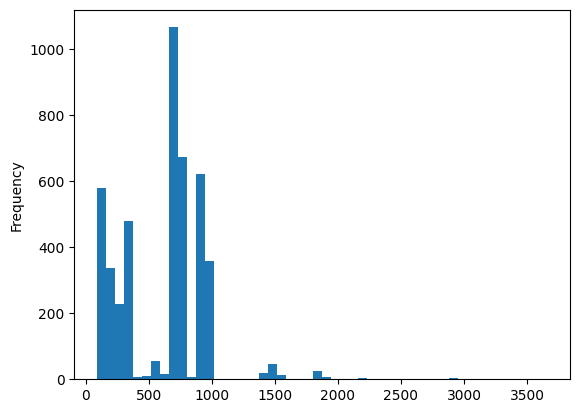

In [155]:
item_rup.plot(kind='hist',bins=50)

In [159]:
item_rup.between(1000,2000).sum()

116